<a href="https://colab.research.google.com/github/nicha0524/DPDM2021/blob/main/Project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#คาดการณ์การซื้อตามชนิดจักรยานต์โดยวิเคราะจากทวีปคู่ค้าและวันในสัปดาห์

##Preprocessing

###ขั้นที่ 1 ดึงข้อมูลจาก drive

In [323]:
import pandas as pd

In [324]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [325]:
import os # จัดการไฟล์และ path

##### ตารางที่ 1 Products (ใช้ข้อมูล PRODCATEGORYID)

In [326]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
Products= pd.read_csv(os.path.join(path,'Products.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
Products

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,TAXTARIFFCODE,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE
0,RO-1001,PR,RO,9,20181003,9,20181003,100000000,1,EA,7.7,KG,USD,525
1,RO-1002,PR,RO,9,20181003,9,20181003,100000001,1,EA,8.0,KG,USD,689
2,RO-1003,PR,RO,12,20181003,12,20181003,100000002,1,EA,9.1,KG,USD,721
3,BX-1011,PR,BX,9,20181003,9,20181003,100000003,1,EA,11.1,KG,USD,249
4,BX-1012,PR,BX,6,20181003,6,20181003,100000004,1,EA,12.0,KG,USD,399
5,BX-1013,PR,BX,7,20181003,7,20181003,100000005,1,EA,13.1,KG,USD,449
6,BX-1014,PR,BX,11,20181003,11,20181003,100000006,1,EA,11.8,KG,USD,799
7,BX-1015,PR,BX,8,20181003,8,20181003,100000007,1,EA,12.5,KG,USD,299
8,BX-1016,PR,BX,11,20181003,11,20181003,100000008,1,EA,12.8,KG,USD,319
9,CC-1021,PR,CC,10,20181003,10,20181003,100000009,1,EA,8.1,KG,USD,1144


##### ตารางที่ 2 SalesOrderItems (ใช้ข้อมูล DELIVERYDATE)

In [327]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
SalesOrderItems= pd.read_csv(os.path.join(path,'SalesOrderItems.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709


##### ตารางที่ 3 SalesOrders (ใช้ข้อมูล SALESORG)

In [328]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
SalesOrders= pd.read_csv(os.path.join(path,'SalesOrders.csv')) # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
SalesOrders

,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,FISCALYEARPERIOD,NOTEID,PARTNERID,SALESORG,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT
0,500000000,4,20180111,4,20180116,2018001,NaN,100000022,APJ,USD,13587,11888.625,1698.375
1,500000001,2,20180112,2,20180115,2018001,NaN,100000026,EMEA,USD,12622,11044.250,1577.750
2,500000002,5,20180115,5,20180120,2018001,NaN,100000018,APJ,USD,45655,39948.125,5706.875
3,500000003,3,20180115,3,20180120,2018001,NaN,100000009,EMEA,USD,101786,89062.750,12723.250
4,500000004,8,20180116,8,20180117,2018001,NaN,100000025,EMEA,USD,71684,62723.500,8960.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,500000329,7,20190619,7,20190620,2019006,NaN,100000031,AMER,USD,90621,79293.375,11327.625
330,500000330,11,20190622,11,20190626,2019006,NaN,100000000,AMER,USD,113871,99637.125,14233.875
331,500000331,3,20190625,3,20190626,2019006,NaN,100000009,EMEA,USD,12693,11106.375,1586.625
332,500000332,13,20190627,13,20190701,2019006,NaN,100000034,AMER,USD,70528,61712.000,8816.000


###ขั้นที่ 2 เชื่อมตาราง โดยใช้ตาราง SalesOrderItems เป็นตารางหลัก


##### เชื่อมตาราง SalesOrderItems และ Products  โดยใช้ PRODUCTID เป็นคีย์ เพื่อ map ข้อมูล PRODCATEGORYID (ชื่อชนิดสินค้า)

In [329]:
SalesOrderItems['name_product'] = SalesOrderItems['PRODUCTID'].map(Products.set_index('PRODUCTID')['PRODCATEGORYID']) 
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709,MB
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709,BX
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709,EB
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709,BX


##### เชื่อมตาราง SalesOrderItems และ SalesOrders โดยใช้ SALEORDERID เป็นคีย์ เพื่อ map ข้อมูล SALESORG (ทวีปที่ตั้งขององค์กรคู่ค้า (partner))

In [330]:
SalesOrderItems['Region'] = SalesOrderItems['SALESORDERID'].map(SalesOrders.set_index('SALESORDERID')['SALESORG']) 
SalesOrderItems

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB,APJ
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB,APJ
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB,EMEA
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,500000333,10,MB-1031,,USD,649,567.875,81.125,I,NaN,10,EA,20190709,MB,APJ
1926,500000333,20,BX-1013,,USD,449,392.875,56.125,I,NaN,3,EA,20190709,BX,APJ
1927,500000333,30,EB-1132,,USD,1900,1662.500,237.500,I,NaN,3,EA,20190709,EB,APJ
1928,500000333,40,BX-1011,,USD,249,217.875,31.125,I,NaN,5,EA,20190709,BX,APJ


#####แปลงข้อมูล ทวีปเป็นตัวเลข

In [331]:
 dw_mapping={'APJ':1, 'EMEA':2, 'AMER':3}
SalesOrderItems['Name_Region']=SalesOrderItems['Region'].map(dw_mapping)

###ขั้นตอนที่ 3 จัดการข้อมูลวันที่

In [332]:
set(SalesOrderItems['DELIVERYDATE']) #ดูว่ามีวันแปลกๆหรือไม่

{20180223,
 20180225,
 20180228,
 20180301,
 20180305,
 20180307,
 20180308,
 20180309,
 20180311,
 20180314,
 20180315,
 20180317,
 20180321,
 20180322,
 20180323,
 20180325,
 20180328,
 20180330,
 20180401,
 20180402,
 20180403,
 20180408,
 20180411,
 20180412,
 20180414,
 20180419,
 20180420,
 20180421,
 20180424,
 20180425,
 20180429,
 20180430,
 20180501,
 20180503,
 20180504,
 20180505,
 20180507,
 20180508,
 20180511,
 20180512,
 20180518,
 20180527,
 20180528,
 20180529,
 20180530,
 20180531,
 20180601,
 20180604,
 20180606,
 20180608,
 20180612,
 20180617,
 20180618,
 20180620,
 20180621,
 20180622,
 20180627,
 20180701,
 20180703,
 20180706,
 20180708,
 20180709,
 20180712,
 20180713,
 20180715,
 20180716,
 20180718,
 20180719,
 20180720,
 20180721,
 20180729,
 20180730,
 20180731,
 20180801,
 20180803,
 20180806,
 20180807,
 20180808,
 20180809,
 20180810,
 20180811,
 20180820,
 20180822,
 20180823,
 20180824,
 20180828,
 20180829,
 20180902,
 20180903,
 20180906,
 20180908,

##### พบว่ามีวันที่ ที่มี ปี ค.ศ. ผิด จึงแปลงเป็นปี 2019 เนื่องจาก มีเพียง 2 ปี (2018-2019) ปี 2999 จึงน่าจะเป็นปี 2019

In [333]:
A=SalesOrderItems[SalesOrderItems['DELIVERYDATE']==29991212] #เลือกเฉพาะ 29991212 ที่ปี ค.ศ.ผิด

In [334]:
A['DELIVERYDATE']=int(20191212) # แทนปี 20191212 แทนปี 29991212

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [335]:
A # ดูข้อมูล

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region
618,500000112,10,HB-1173,,USD,649,567.875,81.125,I,NaN,10,EA,20191212,HB,APJ,1
619,500000112,20,DB-1082,,USD,1250,1093.750,156.250,I,NaN,7,EA,20191212,DB,APJ,1
620,500000112,30,BX-1013,,USD,449,392.875,56.125,I,NaN,5,EA,20191212,BX,APJ,1
621,500000112,40,DB-1082,,USD,1250,1093.750,156.250,I,NaN,5,EA,20191212,DB,APJ,1
622,500000112,50,RC-1054,,USD,5499,4811.625,687.375,I,NaN,2,EA,20191212,RC,APJ,1
623,500000112,60,MB-1033,,USD,3999,3499.125,499.875,I,NaN,4,EA,20191212,MB,APJ,1
624,500000112,70,CB-1163,,USD,288,252.000,36.000,I,NaN,7,EA,20191212,CB,APJ,1
625,500000112,80,EB-1134,,USD,4800,4200.000,600.000,I,NaN,1,EA,20191212,EB,APJ,1
626,500000112,90,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,APJ,1
627,500000112,100,CB-1163,,USD,288,252.000,36.000,I,NaN,2,EA,20191212,CB,APJ,1


In [336]:
Sales_OrderItems=SalesOrderItems[SalesOrderItems['DELIVERYDATE']<29991212] #เลือกข้อมูลมีปีน้อยกว่า 2999

In [337]:
Sale= pd.concat([Sales_OrderItems,A]) # ต่อตาราง A ที่แปลง ค.ศ.แล้ว กับตาราง Sales_OrderItems ที่ตัดปีที่ผิดแล้ว โดยตั้งชื่อตารางใหม่ว่า "Sale"

##### แปลงวันที่เป็น datetime

In [338]:
import pandas as pd # เรียกใช้คำสั่ง panda

In [339]:
Sale['DATE']=pd.to_datetime(Sale['DELIVERYDATE'], format='%Y%m%d') #สร้างคอลัมน์ใหม่ 'DATE' เพื่อใช้เก็บข้อมูลวันที่ ที่แปลงแล้ว

In [340]:
Sale #เรียกดูตาราง

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311,MB,APJ,1,2018-03-11
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311,CB,APJ,1,2018-03-11
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228,HB,EMEA,2,2018-02-28
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA,2,2018-02-28
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA,2,2018-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,500000308,40,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,AMER,3,2019-12-12
1788,500000308,50,MB-1033,,USD,3999,3499.125,499.875,I,NaN,5,EA,20191212,MB,AMER,3,2019-12-12
1789,500000308,60,CC-1023,,USD,1361,1190.875,170.125,I,NaN,8,EA,20191212,CC,AMER,3,2019-12-12
1790,500000308,70,EB-1137,,USD,7900,6912.500,987.500,I,NaN,8,EA,20191212,EB,AMER,3,2019-12-12


####เพิ่มคอลัมน์วันในสัปดาห์ โดยแปลงจากคอลัมน์ DATE โดย
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'


In [341]:
Sale['weekday']=Sale['DATE'].dt.weekday

In [342]:
set(Sale['weekday'])

{0, 1, 2, 3, 4, 5, 6}

###ขั้นที่ 4 ดูข้อมูลว่ามีวันที่ซ้ำกันหรือไม่ ในแต่ละยี่ห้อรถจักยานต์(ถ้ามีเลือกเฉพาะวันที่ที่มีคำสังซื้อ (SALESORDERITEM) เยอะที่สุด)




####4.1 เพิ่่มคอลัมน์ ปี ค.ศ. เดือน และ วัน เพื่อใช้เรียกดูข้อมูล

In [343]:
Sale['day']=Sale['DATE'].dt.day #วันที่

In [344]:
Sale['mount']=Sale['DATE'].dt.month  # เดือน

In [345]:
Sale['year']=Sale['DATE'].dt.year #ปี

####4.2 รถจักยานต์ชนิด Road Bike:RO

In [346]:
RO=Sale[Sale['name_product']=='RO']

#####4.2.1 ดูข้อมูลในแต่ละทวีป

In [347]:
set(RO['Region'])

{'AMER', 'APJ', 'EMEA'}

######1) Region:America

In [348]:
RO_AMER=RO[RO['Region']=='AMER'] #ทวีป America

######เรียกดูข้อมูลปี 2018 

In [349]:
RO_AMER_2018=RO_AMER[RO_AMER['year']==2018]

In [350]:
set(RO_AMER_2018['mount']) ## ไม่มีข้อมูลคำสั่งซื้อในเดือน มกราคม กุมภาพันธ์ และธันวาคม

{3, 4, 5, 6, 7, 8, 9, 10, 11}

###### เรียกดูข้อมูลปี 2018 ในเดือนต่างๆ

######เดือนมีนาคม

In [351]:
RO_AMER_2018_3=RO_AMER_2018[RO_AMER_2018['mount']==3].sort_values(by='day').drop(68) #พบว่ามีวันที่ 21 มีนาคม สั่งสินค้าซ้ำกัน จึงตัดแถวที่มีจำนวนคำสังซื้อน้อยกว่าทิ้งคือแถว 68

######เดือนเมษายน

In [352]:
RO_AMER_2018_4=RO_AMER_2018[RO_AMER_2018['mount']==4].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนพฤษภาคม

In [353]:
RO_AMER_2018_5=RO_AMER_2018[RO_AMER_2018['mount']==5].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนมิถุนายน

In [354]:
RO_AMER_2018_6=RO_AMER_2018[RO_AMER_2018['mount']==6].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนกรกฎาคม

In [355]:
RO_AMER_2018_7=RO_AMER_2018[RO_AMER_2018['mount']==7].sort_values(by='day').drop([429,560]) #ไ#พบว่ามีวันที่ 18  และ31  มีกรกฎาคม มีสั่งสินค้าซ้ำกัน จึงตัดแถวที่มีจำนวนคำสังซื้อน้อยกว่าทิ้งคือแถว 429 และ 560

######เดือนสิงหาคม

In [356]:
RO_AMER_2018_8=RO_AMER_2018[RO_AMER_2018['mount']==8].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนกันยายน

In [357]:
RO_AMER_2018_9=RO_AMER_2018[RO_AMER_2018['mount']==9].sort_values(by='day')#ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนตุลาคม

In [358]:
RO_AMER_2018_10=RO_AMER_2018[RO_AMER_2018['mount']==10].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######เดือนพฤศจิกายน

In [359]:
RO_AMER_2018_11=RO_AMER_2018[RO_AMER_2018['mount']==11].sort_values(by='day') #ไม่มีวันที่ ที่มีคำสั่งซื้อซ้ำ

######ต่อตารางทวีป America

In [360]:
RO_AMERICA_18= pd.concat([RO_AMER_2018_3,RO_AMER_2018_4,RO_AMER_2018_6,RO_AMER_2018_7,RO_AMER_2018_8,RO_AMER_2018_9,RO_AMER_2018_10,RO_AMER_2018_11])

In [361]:
RO_AMERICA_18

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
96,500000017,70,RO-1001,,USD,525,459.375,65.625,I,NaN,8,EA,20180305,RO,AMER,3,2018-03-05,0,5,3,2018
71,500000013,40,RO-1001,,USD,525,459.375,65.625,I,NaN,5,EA,20180321,RO,AMER,3,2018-03-21,2,21,3,2018
56,500000010,10,RO-1002,,USD,689,602.875,86.125,I,NaN,10,EA,20180323,RO,AMER,3,2018-03-23,4,23,3,2018
100,500000019,20,RO-1001,,USD,525,459.375,65.625,I,NaN,5,EA,20180401,RO,AMER,3,2018-04-01,6,1,4,2018
179,500000032,20,RO-1002,,USD,689,602.875,86.125,I,NaN,8,EA,20180419,RO,AMER,3,2018-04-19,3,19,4,2018
299,500000056,70,RO-1002,,USD,689,602.875,86.125,I,NaN,3,EA,20180608,RO,AMER,3,2018-06-08,4,8,6,2018
381,500000070,30,RO-1003,,USD,721,630.875,90.125,I,NaN,4,EA,20180617,RO,AMER,3,2018-06-17,6,17,6,2018
475,500000086,20,RO-1001,,USD,525,459.375,65.625,I,NaN,10,EA,20180715,RO,AMER,3,2018-07-15,6,15,7,2018
431,500000078,40,RO-1002,,USD,689,602.875,86.125,I,NaN,5,EA,20180718,RO,AMER,3,2018-07-18,2,18,7,2018
563,500000101,40,RO-1001,,USD,525,459.375,65.625,I,NaN,9,EA,20180731,RO,AMER,3,2018-07-31,1,31,7,2018


In [362]:

import matplotlib.pyplot as plt


In [363]:
ORDER_RO_A=RO_AMERICA_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_AMERICA_18['weekday']

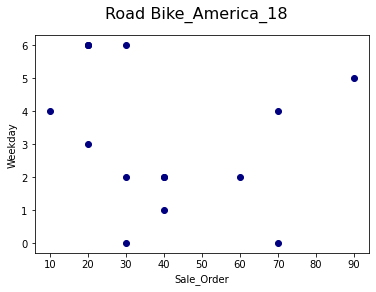

In [364]:

plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันศุกร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_America_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [365]:
RO_AMER_2019=RO_AMER[RO_AMER['year']==2019]

In [366]:
set(RO_AMER_2019['mount'])

{1, 2, 3, 4, 5, 6, 12}

In [367]:
RO_AMERICA_19=RO_AMER_2019.sort_values(by='mount').drop([1358,1372,1613,1614,1886])

In [368]:
ORDER_RO_A=RO_AMERICA_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_AMERICA_19['weekday']

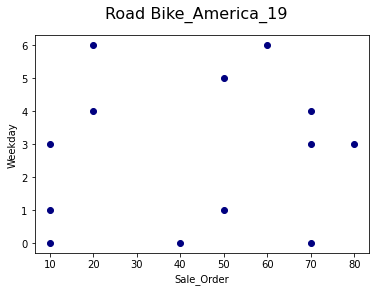

In [369]:

plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_America_19',fontsize=16)
plt.show()

In [370]:
RO_AMERICA= pd.concat([RO_AMERICA_18,RO_AMERICA_19])

######2) Region: Asia_Pacific_and_Japan

In [371]:
RO_APJ=RO[RO['Region']=='APJ'] #ทวีป Asia_Pacific_and_Japan

######เรียกดูข้อมูลปี 2018 

In [372]:
RO_APJ_2018=RO_APJ[RO_APJ['year']==2018]

In [373]:
RO_APJ_18=RO_APJ_2018.sort_values(by='mount').drop(849)

In [374]:
ORDER_RO_A=RO_APJ_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_APJ_18['weekday']

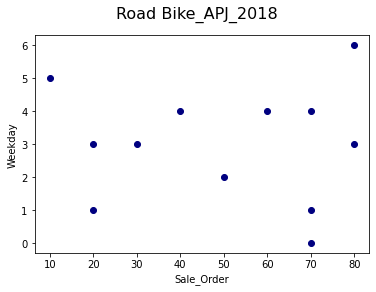

In [375]:

plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันเสาร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_APJ_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [376]:
RO_APJ_2019=RO_APJ[RO_APJ['year']==2019]

In [377]:
RO_APJ_19=RO_APJ_2019.sort_values(by='mount').drop([1184,1199,1277,1544])

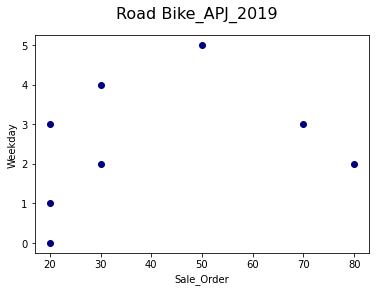

In [378]:
ORDER_RO_A=RO_APJ_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_APJ_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_APJ_2019',fontsize=16)
plt.show()

In [379]:
RO_AP_J= pd.concat([RO_APJ_18,RO_APJ_19])

######3) Region:Europe_the_Middle_East_and_Africa

In [380]:
RO_EMEA=RO[RO['Region']=='EMEA'] #ทวีป Europe_the_Middle_East_and_Africa

######เรียกดูข้อมูลปี 2018 

In [381]:
RO_EMEA_2018=RO_EMEA[RO_EMEA['year']==2018]

In [382]:
RO_EMEA_18=RO_EMEA_2018.sort_values(by='mount').drop([127,555,992,920,1082]) #ตัดข้อมูลที่สั่งในวันเดียวกันที่มีจำนวนคำสั่งซื้อน้อยกว่าทิ้ง 

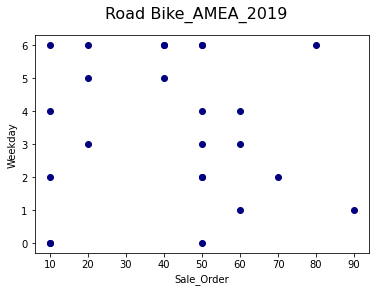

In [383]:
ORDER_RO_A=RO_EMEA_18['SALESORDERITEM']
WEEKDAY_RO_A=RO_EMEA_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_AMEA_2019',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [384]:
RO_EMEA_2019=RO_EMEA[RO_EMEA['year']==2019]

In [385]:
RO_EMEA_19=RO_EMEA_2019.sort_values(by='mount').drop([1072,1167,1260,1287,1850])#ตัดข้อมูลที่สั่งในวันเดียวกันที่มีจำนวนคำสั่งซื้อน้อยกว่าทิ้ง 

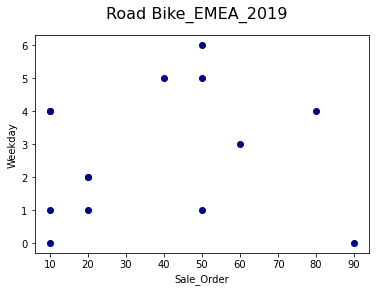

In [386]:
ORDER_RO_A=RO_EMEA_19['SALESORDERITEM']
WEEKDAY_RO_A=RO_EMEA_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike_EMEA_2019',fontsize=16)
plt.show()

In [387]:
RO_E_MEA= pd.concat([RO_EMEA_18,RO_EMEA_19])

######รวมตาราง ทั้งสามทวีป

In [388]:
Road_Bike= pd.concat([RO_AMERICA,RO_AP_J,RO_E_MEA])

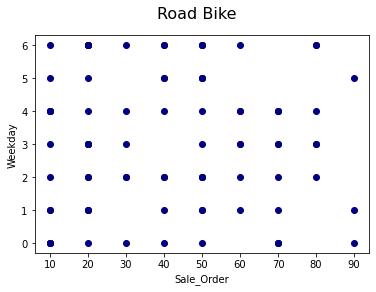

In [389]:
ORDER_RO_A=Road_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Road_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ จันทร์ และ ศุกร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Road Bike',fontsize=16)
plt.show()

####4.3 รถจักยานต์ชนิด BMX : BX

In [390]:
BX=Sale[Sale['name_product']=='BX']

#####4.3.1 ดูข้อมูลในแต่ละทวีป

######1) Region:America

In [391]:
BX_AMER=BX[BX['Region']=='AMER'] #ทวีป America

######เรียกดูข้อมูลปี 2018 

In [392]:
BX_AMER_2018=BX_AMER[BX_AMER['year']==2018]

In [393]:
BX_AMER_18=BX_AMER_2018.sort_values(by='mount').drop([595,596,600,601,602,680,833,770])

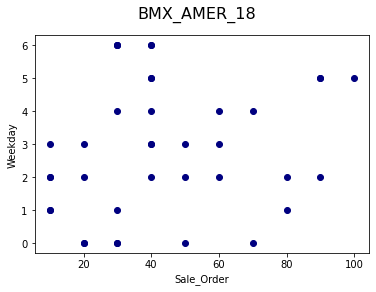

In [394]:
ORDER_RO_A=BX_AMER_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_AMER_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX_AMER_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี *2019* 

In [395]:
BX_AMER_2019=BX_AMER[BX_AMER['year']==2019]

In [396]:
BX_AMER_19=BX_AMER_2019.sort_values(by='mount').drop([1407,1416,1413,1368,1579,1719,1760,1908,1770,1893])

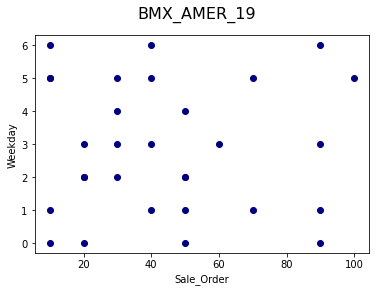

In [397]:
ORDER_RO_A=BX_AMER_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_AMER_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันจันทร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX_AMER_19',fontsize=16)
plt.show()

In [398]:
BX_A_MER= pd.concat([BX_AMER_18,BX_AMER_19])

######2) Region: Asia_Pacific_and_Japan

In [399]:
BX_APJ=BX[BX['Region']=='APJ'] #ทวีป Asia_Pacific_and_Japan

######เรียกดูข้อมูลปี 2018 

In [400]:
BX_APJ_2018=BX_APJ[BX_APJ['year']==2018]

In [401]:
set(BX_APJ['mount'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [402]:
BX_APJ_2018_6=BX_APJ_2018[(BX_APJ_2018['mount']>=1)&(BX_APJ_2018['mount']<=6)].sort_values(by='mount').drop([10,46,239,238,117,155,242,245,349,357,358]) #ครึ่งปีแรก

In [403]:
BX_APJ_2018_12=BX_APJ_2018[(BX_APJ_2018['mount']>=7)&(BX_APJ_2018['mount']<=12)].sort_values(by='mount').drop([391,395,538,645,666,678,823,786,795,973,968,967,851,977,981,1062,1116]) #ครึ่งปีหลัง

In [404]:
BX_APJ_18= pd.concat([BX_APJ_2018_6,BX_APJ_2018_12])

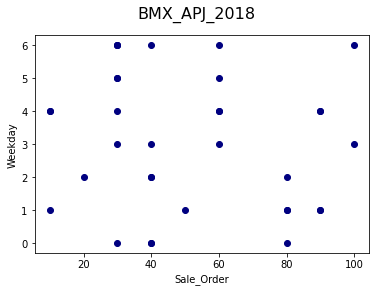

In [405]:
ORDER_RO_A=BX_APJ_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_APJ_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันเสาร์
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX_APJ_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019 

In [406]:
BX_APJ_2019=BX_APJ[BX_APJ['year']==2019]

In [407]:
BX_APJ_19=BX_APJ_2019.sort_values(by='mount').drop([1200,1269,1432,1521,1636,1600,1598,1926,1928])

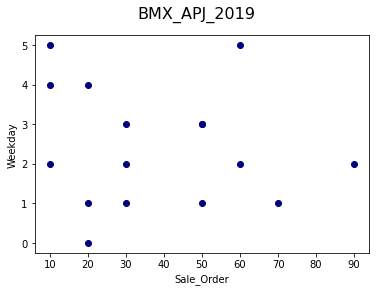

In [408]:
ORDER_RO_A=BX_APJ_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_APJ_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX_APJ_2019',fontsize=16)
plt.show()

In [409]:
BX_A_PJ= pd.concat([BX_APJ_18,BX_APJ_19])

######3) Region:Europe_the_Middle_East_and_Africa

In [410]:
BX_EMEA=BX[BX['Region']=='EMEA']

In [411]:
BX_EMEA

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
13,500000003,20,BX-1013,,USD,449,392.875,56.125,I,NaN,2,EA,20180223,BX,EMEA,2,2018-02-23,4,23,2,2018
20,500000004,10,BX-1014,,USD,799,699.125,99.875,I,NaN,3,EA,20180305,BX,EMEA,2,2018-03-05,0,5,3,2018
23,500000004,40,BX-1013,,USD,449,392.875,56.125,I,NaN,6,EA,20180305,BX,EMEA,2,2018-03-05,0,5,3,2018
31,500000005,40,BX-1011,,USD,249,217.875,31.125,I,NaN,10,EA,20180301,BX,EMEA,2,2018-03-01,3,1,3,2018
86,500000016,20,BX-1012,,USD,399,349.125,49.875,I,NaN,1,EA,20180307,BX,EMEA,2,2018-03-07,2,7,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,500000321,90,BX-1012,,USD,399,349.125,49.875,I,NaN,7,EA,20190605,BX,EMEA,2,2019-06-05,2,5,6,2019
1867,500000322,30,BX-1013,,USD,449,392.875,56.125,I,NaN,5,EA,20190617,BX,EMEA,2,2019-06-17,0,17,6,2019
1880,500000323,60,BX-1011,,USD,249,217.875,31.125,I,NaN,9,EA,20190610,BX,EMEA,2,2019-06-10,0,10,6,2019
1883,500000324,20,BX-1016,,USD,319,279.125,39.875,I,NaN,2,EA,20190606,BX,EMEA,2,2019-06-06,3,6,6,2019


######เรียกดูข้อมูลปี 2018 

In [412]:
BX_EMEA_2018=BX_EMEA[BX_EMEA['year']==2018]

In [413]:
set(BX_EMEA_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [414]:
BX_EMEA_2018_6=BX_EMEA_2018[(BX_EMEA_2018['mount']>=2)&(BX_EMEA_2018['mount']<=6)].sort_values(by='mount').drop([165,20,132,261,287,267,263,375,206,219,222,218,376])

In [415]:
BX_EMEA_2018_12=BX_EMEA_2018[(BX_EMEA_2018['mount']>=7)&(BX_EMEA_2018['mount']<=12)].sort_values(by='mount').drop([881,879,755,705,700,759,889,1081,1086,1038,1040,958])

In [416]:
BX_EMEA_18= pd.concat([BX_EMEA_2018_6,BX_EMEA_2018_12])

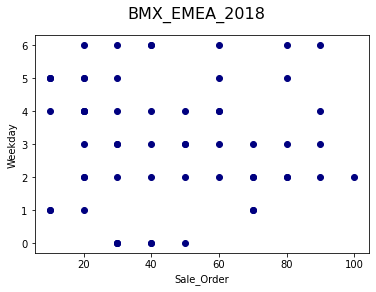

In [417]:
ORDER_RO_A=BX_EMEA_18['SALESORDERITEM']
WEEKDAY_RO_A=BX_EMEA_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX_EMEA_2018',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [418]:
BX_EMEA_2019=BX_EMEA[BX_EMEA['year']==2019]

In [419]:
set(BX_EMEA_2019['mount'])

{1, 2, 3, 4, 5, 6}

In [420]:
BX_EMEA_2019_3=BX_EMEA_2019[(BX_EMEA_2019['mount']>=1)&(BX_EMEA_2019['mount']<=3)].sort_values(by='mount').drop([1292,1285,1282,1146,1179,1143,1347,1346,1348,1478,1376,1449])

In [421]:
BX_EMEA_2019_6=BX_EMEA_2019[(BX_EMEA_2019['mount']>=4)&(BX_EMEA_2019['mount']<=6)].sort_values(by='mount').drop([1494,1749,1708,1668,1666,1744,1861,1883])

In [422]:
BX_EMEA_19= pd.concat([BX_EMEA_2019_3,BX_EMEA_2019_6])

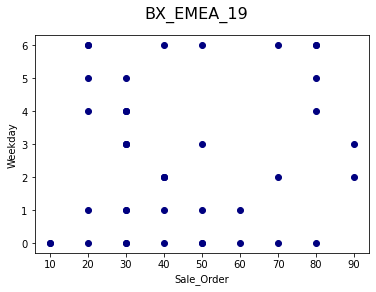

In [423]:
ORDER_RO_A=BX_EMEA_19['SALESORDERITEM']
WEEKDAY_RO_A=BX_EMEA_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ และวันอังคาร
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BX_EMEA_19',fontsize=16)
plt.show()

In [424]:
BX_EM_EA= pd.concat([BX_EMEA_18,BX_AMER_19])

In [425]:
BMX= pd.concat([BX_A_MER,BX_A_PJ,BX_EM_EA]) #รวมทวีป

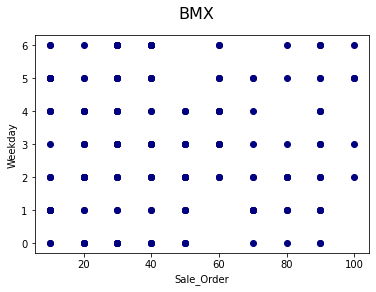

In [426]:
ORDER_RO_A=BMX['SALESORDERITEM']
WEEKDAY_RO_A=BMX['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพุธ เสาร์ ศุกร์และวันอังคาร 
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('BMX',fontsize=16)
plt.show()

####4.4 รถจักยานต์ชนิด Cyclo-cross : CC





In [427]:
CC=Sale[Sale['name_product']=='CC']

In [428]:
CC

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228,CC,EMEA,2,2018-02-28,2,28,2,2018
11,500000002,60,CC-1021,,USD,1144,1001.000,143.000,I,NaN,4,EA,20180309,CC,APJ,1,2018-03-09,4,9,3,2018
29,500000005,20,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180301,CC,EMEA,2,2018-03-01,3,1,3,2018
43,500000008,20,CC-1022,,USD,1200,1050.000,150.000,I,NaN,6,EA,20180225,CC,EMEA,2,2018-02-25,6,25,2,2018
44,500000008,30,CC-1023,,USD,1361,1190.875,170.125,I,NaN,10,EA,20180225,CC,EMEA,2,2018-02-25,6,25,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,500000332,40,CC-1022,,USD,1200,1050.000,150.000,I,NaN,3,EA,20190619,CC,AMER,3,2019-06-19,2,19,6,2019
626,500000112,90,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,APJ,1,2019-12-12,3,12,12,2019
935,500000164,30,CC-1023,,USD,1361,1190.875,170.125,I,NaN,1,EA,20191212,CC,AMER,3,2019-12-12,3,12,12,2019
1787,500000308,40,CC-1023,,USD,1361,1190.875,170.125,I,NaN,3,EA,20191212,CC,AMER,3,2019-12-12,3,12,12,2019


######เรียกดูข้อมูลปี 2018

In [429]:
CC_2018=CC[CC['year']==2018]

In [430]:
set(CC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [431]:
CC_2018_6=CC_2018[(CC_2018['mount']>=2)&(CC_2018['mount']<=6)].sort_values(by='mount').drop([43,49,72,123,122,121,118,116,282,355])

In [432]:
CC_2018_12=CC_2018[(CC_2018['mount']>=7)&(CC_2018['mount']<=12)].sort_values(by='mount').drop([709,649,897,859,869,1128])

In [433]:
CC_18= pd.concat([CC_2018_6,CC_2018_12])

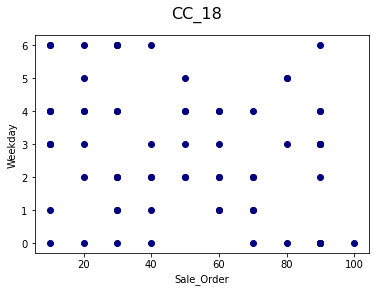

In [434]:
ORDER_RO_A=CC_18['SALESORDERITEM']
WEEKDAY_RO_A=CC_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ 
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('CC_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [435]:
CC_2019=CC[CC['year']==2019]

In [436]:
set(CC_2019['mount'])

{1, 2, 3, 4, 5, 6, 12}

In [437]:
CC_2019_6=CC_2019[(CC_2019['mount']>=1)&(CC_2019['mount']<=6)].sort_values(by='mount').drop([1171,1261,1264,1308,1557,1551,1801,1781,1755,1669,1667,1903,1855,1851,1821,1815])

In [438]:
CC_2019_12=CC_2019[CC_2019['mount']==12].sort_values(by='mount').iloc[[0],]

In [439]:
CC_19= pd.concat([CC_2019_6,CC_2019_6])

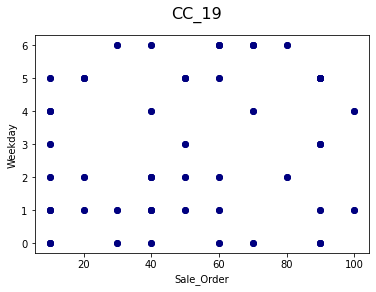

In [440]:
ORDER_RO_A=CC_19['SALESORDERITEM']
WEEKDAY_RO_A=CC_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์ 
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('CC_19',fontsize=16)
plt.show()

In [441]:
Cyclo_cross_BiKE= pd.concat([CC_18,CC_19]) #รวมรายปี

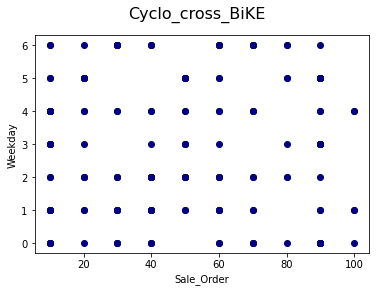

In [442]:
ORDER_RO_A=Cyclo_cross_BiKE['SALESORDERITEM']
WEEKDAY_RO_A=Cyclo_cross_BiKE['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์  จันทร์ และพฤหัสบดี
plt.ylabel('Weekday')
plt.xlabel('Sale_Order')
plt.suptitle('Cyclo_cross_BiKE',fontsize=16)
plt.show()

####4.5 รถจักยานต์ชนิด Mountain Bike:MB

In [443]:
MB=Sale[Sale['name_product']=='MB']

######เรียกดูข้อมูลปี 2018

In [444]:
MB_2018=MB[MB['year']==2018]

In [445]:
set(MB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [446]:
MB_2018_7=MB_2018[(MB_2018['mount']>=2)&(MB_2018['mount']<=7)].sort_values(by='mount').drop([24,58,60,329,326,280,415,416,308,341,403,506,445])

In [447]:
MB_2018_12=MB_2018[(MB_2018['mount']>=8)&(MB_2018['mount']<=12)].sort_values(by='mount').drop([532,599,682,682,644,845,817,835,752,723,721,952,910,1018,862,1025,1056,864,1018,937])

In [448]:
MB_18= pd.concat([MB_2018_7,MB_2018_12])

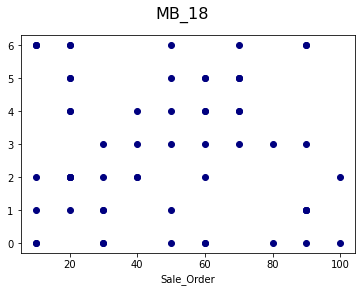

In [449]:
ORDER_RO_A=MB_18['SALESORDERITEM']
WEEKDAY_RO_A=MB_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอาทิตย์  อังคาร
plt.xlabel('Sale_Order')
plt.suptitle('MB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [450]:
MB_2019=MB[MB['year']==2019]

In [451]:
set(MB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [452]:
MB_2019_4=MB_2019[(MB_2019['mount']>=1)&(MB_2019['mount']<=4)].sort_values(by='mount').drop([1247,1224,1138,1390,1652,1623,1596,1513])

In [453]:
MB_2019_12=MB_2019[(MB_2019['mount']>=5)&(MB_2019['mount']<=12)].sort_values(by='mount').drop([1735,1690,1885,1846,1820,1769,1823,1785])

In [454]:
MB_19= pd.concat([MB_2019_4,MB_2019_12])

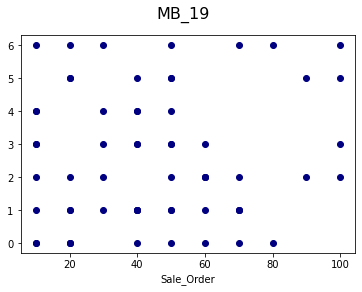

In [455]:
ORDER_RO_A=MB_19['SALESORDERITEM']
WEEKDAY_RO_A=MB_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคารพุธ เสาร์และอาทิตย์
plt.xlabel('Sale_Order')
plt.suptitle('MB_19',fontsize=16)
plt.show()

In [456]:
Mountain_Bike= pd.concat([MB_18,MB_19])  #รวมข้อมูลรายปี

####4.6 รถจักยานต์ชนิด Racing_BiKe:RC

In [457]:
RC=Sale[Sale['name_product']=='RC']

In [458]:
RC

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE,name_product,Region,Name_Region,DATE,weekday,day,mount,year
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228,RC,EMEA,2,2018-02-28,2,28,2,2018
7,500000002,20,RC-1055,,USD,1999,1749.125,249.875,I,NaN,3,EA,20180309,RC,APJ,1,2018-03-09,4,9,3,2018
12,500000003,10,RC-1056,,USD,2499,2186.625,312.375,I,NaN,3,EA,20180223,RC,EMEA,2,2018-02-23,4,23,2,2018
14,500000003,30,RC-1056,,USD,2499,2186.625,312.375,I,NaN,5,EA,20180223,RC,EMEA,2,2018-02-23,4,23,2,2018
26,500000004,70,RC-1051,,USD,2499,2186.625,312.375,I,NaN,10,EA,20180305,RC,EMEA,2,2018-03-05,0,5,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,500000332,70,RC-1055,,USD,1999,1749.125,249.875,I,NaN,4,EA,20190619,RC,AMER,3,2019-06-19,2,19,6,2019
1924,500000332,80,RC-1054,,USD,5499,4811.625,687.375,I,NaN,1,EA,20190619,RC,AMER,3,2019-06-19,2,19,6,2019
622,500000112,50,RC-1054,,USD,5499,4811.625,687.375,I,NaN,2,EA,20191212,RC,APJ,1,2019-12-12,3,12,12,2019
933,500000164,10,RC-1055,,USD,1999,1749.125,249.875,I,NaN,7,EA,20191212,RC,AMER,3,2019-12-12,3,12,12,2019


######เรียกดูข้อมูลปี 2018

In [459]:
######เรียกดูข้อมูลปี 2018

In [460]:
RC_2018=RC[RC['year']==2018]

In [461]:
set(RC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [462]:
RC_2018_6=RC_2018[(RC_2018['mount']>=2)&(RC_2018['mount']<=6)].sort_values(by='mount').drop([12,111,92,85,70,38,28,142,141,156,290,289,288,291,265,244,324,352])

In [463]:
RC_2018_12=RC_2018[(RC_2018['mount']>=7)&(RC_2018['mount']<=12)].sort_values(by='mount').drop([594,590,571,612,521,493,497,660,661,663,654,630,628,609])

In [464]:
RC_18= pd.concat([RC_2018_6,RC_2018_6])

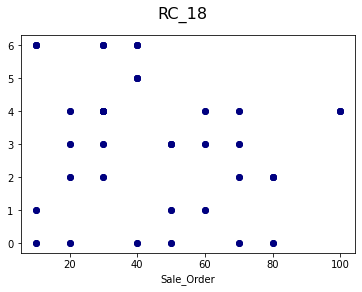

In [465]:
ORDER_RO_A=RC_18['SALESORDERITEM']
WEEKDAY_RO_A=RC_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('RC_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [466]:
RC_2019=RC[RC['year']==2019]

In [467]:
set(RC_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [468]:
RC_2019_4=RC_2019[(RC_2019['mount']>=2)&(RC_2019['mount']<=4)].sort_values(by='mount').drop([1320,1343,1363,1398,1464,1543,1394,1383,1382,1554,1510,1506,1503,1497,1496,1624])

In [469]:
RC_2019_12=RC_2019[(RC_2019['mount']>=5)&(RC_2019['mount']<=12)].sort_values(by='mount').drop([1763,1761,1757,1737,1731,1712,1704,1697,1696,1695,1693,1901,1904,1916,1922,1774,1831,1793,933])

In [470]:
RC_19= pd.concat([RC_2019_4,RC_2019_12])

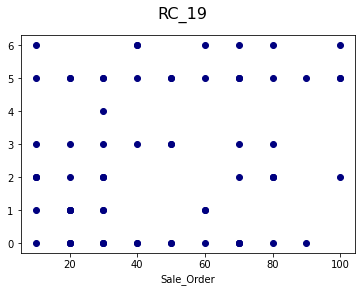

In [471]:
ORDER_RO_A=RC_19['SALESORDERITEM']
WEEKDAY_RO_A=RC_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('RC_19',fontsize=16)
plt.show()

In [472]:
Racing_Bike= pd.concat([RC_18,RC_19]) #รวมข้อมูลรายปี

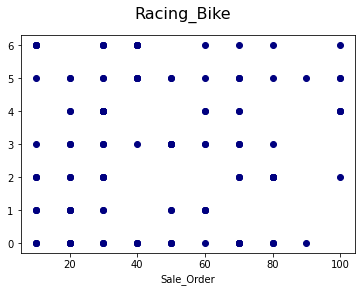

In [473]:
ORDER_RO_A=Racing_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Racing_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือวันอังคาร วันพฤหัสบดี ศุกร์ และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('Racing_Bike',fontsize=16)
plt.show()

####4.7 รถจักยานต์ชนิด Downhill Bike

In [474]:
DB=Sale[Sale['name_product']=='DB']

######เรียกดูข้อมูลปี 2018

In [475]:
DB_2018=DB[DB['year']==2018]

In [476]:
set(DB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [477]:
DB_2018_6=DB_2018[(DB_2018['mount']>=2)&(DB_2018['mount']<=6)].sort_values(by='mount').drop([8,77,91,228,130,99,252,264,283])

In [478]:
DB_2018_12=DB_2018[(DB_2018['mount']>=7)&(DB_2018['mount']<=12)].sort_values(by='mount').drop([742,1035,729,918,1153])

In [479]:
DB_18= pd.concat([DB_2018_6,DB_2018_6])

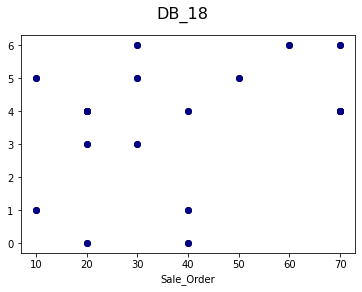

In [480]:
ORDER_RO_A=DB_18['SALESORDERITEM']
WEEKDAY_RO_A=DB_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันพฤหัสบดี  และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('DB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [481]:
DB_2019=DB[DB['year']==2019]

In [482]:
DB_19=DB_2019.drop([1221,1257,1353,1377,1387,1486,1546,1837,1838,1856,619])

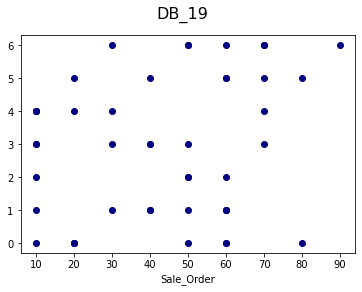

In [483]:
ORDER_RO_A=DB_19['SALESORDERITEM']
WEEKDAY_RO_A=DB_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ เสาร์
plt.xlabel('Sale_Order')
plt.suptitle('DB_19',fontsize=16)
plt.show()

In [484]:
Downhill_Bike= pd.concat([DB_18,DB_19]) #ต่อตาราง

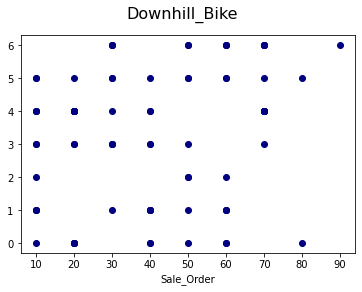

In [485]:
ORDER_RO_A=Downhill_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Downhill_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันพฤหัสบดี  และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('Downhill_Bike',fontsize=16)
plt.show()

####4.8 รถจักยานต์ชนิด eBike:EB

In [486]:
EB=Sale[Sale['name_product']=='EB']

######เรียกดูข้อมูลปี 2018

In [487]:
EB_2018=EB[EB['year']==2018]

In [488]:
set(EB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [489]:
EB_2018_6=EB_2018[(EB_2018['mount']>=2)&(EB_2018['mount']<=6)].sort_values(by='mount').drop([16,9,48,47,164,88,36,34,19,233,195,194,196,180,147,158,311,272,209,210,214,216,373,50,294,295,293,343])

In [490]:
EB_2018_12=EB_2018[(EB_2018['mount']>=7)&(EB_2018['mount']<=12)].sort_values(by='mount').drop([418,417,392,390,542,536,689,651,692,746,843,837,826,785,756,842,822,785,735,842,720,919,702,719,1084,978,955,930,927,964,896,895,1104,1000,870,1017,1005,1059,1063,1002,938])

In [491]:
EB_18= pd.concat([EB_2018_6,EB_2018_12]) #ต่อตาราง

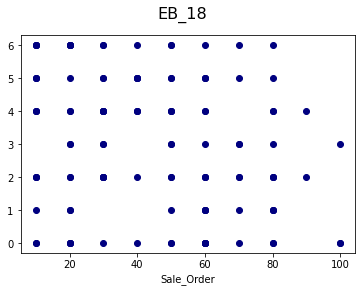

In [492]:
ORDER_RO_A=EB_18['SALESORDERITEM']
WEEKDAY_RO_A=EB_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์และวันพุธ
plt.xlabel('Sale_Order')
plt.suptitle('EB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [493]:
EB_2019=EB[EB['year']==2019]

In [494]:
set(EB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [495]:
EB_2019_2=EB_2019[(EB_2019['mount']>=1)&(EB_2019['mount']<=2)].sort_values(by='mount').drop([1274,1267,1245,1161,1208,1192,1162,1173,1399,1149,1178,1400,1349,1185,1217])

In [496]:
EB_2019_4=EB_2019[(EB_2019['mount']>=3)&(EB_2019['mount']<=4)].sort_values(by='mount').drop([1616,1597,1586,1576,1609,1536,1533,1507,1501,1559])

In [497]:
EB_2019_12=EB_2019[(EB_2019['mount']>=5)&(EB_2019['mount']<=12)].sort_values(by='mount').drop([1691,1678,1672,1650,1662,1875,1858,1910,1792,934])

In [498]:
EB_19= pd.concat([EB_2019_2,EB_2019_4,EB_2019_12]) #ต่อตาราง

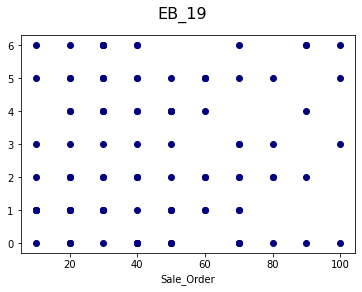

In [499]:
ORDER_RO_A=EB_19['SALESORDERITEM']
WEEKDAY_RO_A=EB_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ วันพุธ ศุุกร์และเสาร์
plt.xlabel('Sale_Order')
plt.suptitle('EB_19',fontsize=16)
plt.show()

In [500]:
eBike= pd.concat([EB_18,EB_19]) #ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

####4.9 รถจักยานต์ชนิด Cruiser:CB

In [501]:
CB=Sale[Sale['name_product']=='CB']

######เรียกดูข้อมูลปี 2018

In [502]:
CB_2018=CB[CB['year']==2018]

In [503]:
set(CB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [504]:
CB_2018_6=CB_2018[(CB_2018['mount']>=2)&(CB_2018['mount']<=6)].sort_values(by='mount').drop([76,200,144,338,325,309,254,243,215,296,348])

In [505]:
CB_2018_12=CB_2018[(CB_2018['mount']>=7)&(CB_2018['mount']<=12)].sort_values(by='mount').drop([389,487,550,552,715,917,993,1110,1045])

In [506]:
CB_18= pd.concat([CB_2018_6,CB_2018_12]) #ต่อตาราง

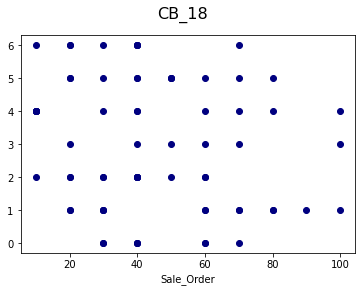

In [507]:
ORDER_RO_A=CB_18['SALESORDERITEM']
WEEKDAY_RO_A=CB_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('CB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [508]:
CB_2019=CB[CB['year']==2019]

In [509]:
CB_19=CB_2019.sort_values(by='mount').drop([1195,1338,1625,1573,1523,1457,1460,1585,1529,1868,1826,1825,624])

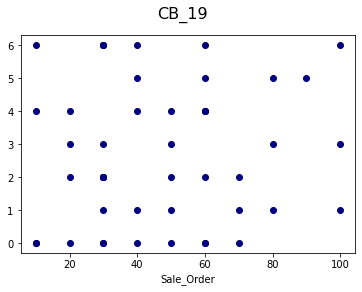

In [510]:
ORDER_RO_A=CB_19['SALESORDERITEM']
WEEKDAY_RO_A=CB_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('CB_19',fontsize=16)
plt.show()

In [511]:
Cruiser= pd.concat([CB_18,CB_19]) ##ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

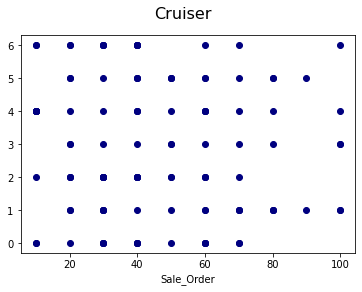

In [512]:
ORDER_RO_A=Cruiser['SALESORDERITEM']
WEEKDAY_RO_A=Cruiser['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันจันทร์ วันพุธ และวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('Cruiser',fontsize=16)
plt.show()

####4.10 รถจักยานต์ชนิด Hybrid Bike:HB

In [513]:
HB=Sale[Sale['name_product']=='HB']

######เรียกดูข้อมูลปี 2018

In [514]:
HB_2018=HB[HB['year']==2018]

In [515]:
set(HB_2018['mount'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [516]:
HB_2018_6=HB_2018[(HB_2018['mount']>=2)&(HB_2018['mount']<=6)].sort_values(by='mount').drop([126,163,6,54,198,140,133,154,115,336,335,334,304,301,302,385,380,374,366,351,399,372])

In [517]:
HB_2018_9=HB_2018[(HB_2018['mount']>=7)&(HB_2018['mount']<=9)].sort_values(by='mount').drop([504,439,512,665,672])

In [518]:
HB_2018_12=HB_2018[(HB_2018['mount']>=10)&(HB_2018['mount']<=12)].sort_values(by='mount').drop([815,794,793,792,788,781,763,758,970,1014,781,763,758,970,1014,991,901,872,807,1048,954])

In [519]:
HB_18= pd.concat([HB_2018_6,HB_2018_9,HB_2018_12]) #ต่อตารางรายเดือนในปี 2018

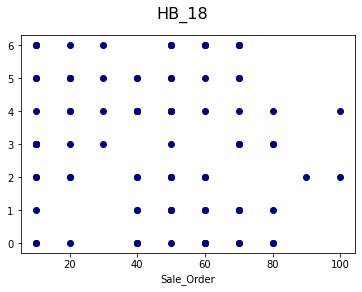

In [520]:
ORDER_RO_A=HB_18['SALESORDERITEM']
WEEKDAY_RO_A=HB_18['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอังคารและวันพฤหัสบดี
plt.xlabel('Sale_Order')
plt.suptitle('HB_18',fontsize=16)
plt.show()

######เรียกดูข้อมูลปี 2019

In [521]:
HB_2019=HB[HB['year']==2019]

In [522]:
set(HB_2019['mount'])

{1, 2, 3, 4, 5, 6, 7, 12}

In [523]:
HB_2019_3=HB_2019[(HB_2019['mount']>=1)&(HB_2019['mount']<=3)].sort_values(by='mount').drop([1283,1228,1181,1174,1408,1329,1323,1318,1314,1315,1430,1433,1447])

In [524]:
HB_2019_12=HB_2019[(HB_2019['mount']>=4)&(HB_2019['mount']<=12)].sort_values(by='mount').drop([1642,1620,1617,1535,1508,1504,1659,1685,1913,1872,1870,1869,1840,1812,1810])

In [525]:
HB_19= pd.concat([HB_2019_3,HB_2019_12]) #ต่อตารางรายเดือนในปี 2018

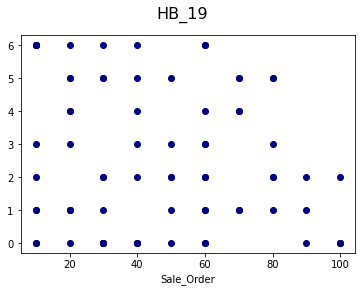

In [526]:
ORDER_RO_A=HB_19['SALESORDERITEM']
WEEKDAY_RO_A=HB_19['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('HB_19',fontsize=16)
plt.show()

In [527]:
Hybrid_Bike= pd.concat([HB_18,HB_19]) ##ต่อตารางข้อมูลรายปีที่ตัดข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้งทิ้ง

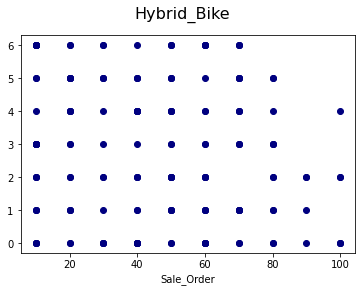

In [528]:
ORDER_RO_A=Hybrid_Bike['SALESORDERITEM']
WEEKDAY_RO_A=Hybrid_Bike['weekday']
plt.scatter(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('Hybrid_Bike',fontsize=16)
plt.show()

###ขั้นที่ 5 นำข้อมูลวันที่ที่ มีค่าซ้ำ โดยเลือกเฉพาะวันที่ที่มียอดคำสั่งสินค้าสูงสุด ที่เหลือตัดทิ้ง ในขั้นตอนที่ 4 ตามชนิดของจักรยานต์มาต่อกัน




##### เชื่อมตาราง เลือกเฉพาะคอลัมน์ ทวีปของคู่ค้า:Region ,วันในสัปดาห์:weekday และ ชื่อสินค้า:name_product

In [529]:
 Sale_Order_item=pd.concat([Road_Bike,BMX,Cyclo_cross_BiKE,Mountain_Bike,Racing_Bike,Downhill_Bike,eBike,Cruiser,Hybrid_Bike]).iloc[:,[15,17,13]]

#####ข้อมูลวันในสัปดาห์ที่มี ยอดคำสั่งซื้อสูงสุดเรียงจากมากไปน้อย

In [530]:
 Sale_Or=pd.concat([Road_Bike,BMX,Cyclo_cross_BiKE,Mountain_Bike,Racing_Bike,Downhill_Bike,eBike,Cruiser,Hybrid_Bike]).iloc[:,[1,15,17,13]]

######ยอดคำสั่งซื้อทุกทวีป

In [546]:
 Word=Sale_Or.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [547]:
 Word

,weekday,SALESORDERITEM,Name_Region
0,0,10060,459
1,2,9680,449
2,1,8920,391
3,5,8540,371
4,4,8390,349
5,3,7880,354
6,6,7600,361


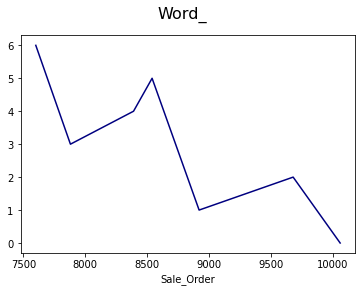

In [548]:
ORDER_RO_A= Word['SALESORDERITEM']
WEEKDAY_RO_A= Word['weekday']
plt.plot(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('Word_',fontsize=16)
plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ของอเมริกา('AMER':3)

In [549]:
AMERICA=Sale_Or[Sale_Or['Name_Region']==3]

In [550]:
A_MERICA=AMERICA.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [551]:
A_MERICA

,weekday,SALESORDERITEM,Name_Region
0,5,3300,177
1,2,3130,222
2,3,2960,192
3,0,2840,198
4,1,2240,174
5,6,1920,141
6,4,1350,99


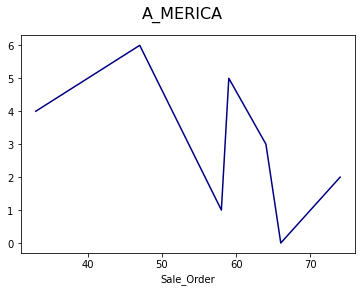

In [537]:
ORDER_RO_A= A_MERICA['SALESORDERITEM']
WEEKDAY_RO_A= A_MERICA['weekday']
plt.plot(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('A_MERICA',fontsize=16)
plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ขอEurope_the_Middle_East_and_Africa :'EMEA':2

In [552]:
Europe=Sale_Or[Sale_Or['Name_Region']==2]

In [556]:
Eu_rope=Europe.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [557]:
Eu_rope

,weekday,SALESORDERITEM,Name_Region
0,0,5020,220
1,2,4230,182
2,6,3980,178
3,4,3810,174
4,1,3400,156
5,5,3400,148
6,3,2830,122


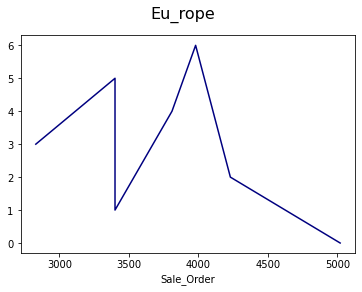

In [558]:
ORDER_RO_A= Eu_rope['SALESORDERITEM']
WEEKDAY_RO_A= Eu_rope['weekday']
plt.plot(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('Eu_rope',fontsize=16)
plt.show()

######ยอดคำสั่งซื้อตามวันในสัปดาห์ของAsia ('APJ':1)

In [560]:
Asia=Sale_Or[Sale_Or['Name_Region']==1]

In [561]:
A_sia=Asia.groupby('weekday').sum().sort_values(by=['SALESORDERITEM'],ascending=False).reset_index()

In [562]:
A_sia

,weekday,SALESORDERITEM,Name_Region
0,1,3280,61
1,4,3230,76
2,2,2320,45
3,0,2200,41
4,3,2090,40
5,5,1840,46
6,6,1700,42


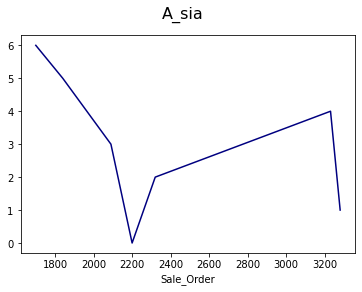

In [563]:
ORDER_RO_A= A_sia['SALESORDERITEM']
WEEKDAY_RO_A= A_sia['weekday']
plt.plot(ORDER_RO_A,WEEKDAY_RO_A,color='navy') #พบว่าวันที่มีคำสังซื้อเยอะที่สุดคือ วันอาทิตย์ และวันอังคาร
plt.xlabel('Sale_Order')
plt.suptitle('A_sia',fontsize=16)
plt.show()

##classification โดยใช้ 
1.kNN_evaluation
2.Decision_Tree

    

##### Load data

In [564]:
 Sale_Order_item

,Name_Region,weekday,name_product
96,3,0,RO
71,3,2,RO
56,3,4,RO
100,3,6,RO
179,3,3,RO
...,...,...,...
1806,2,3,HB
1794,1,2,HB
1857,2,2,HB
1899,2,0,HB


In [567]:
import numpy as np
X=np.array( Sale_Order_item[['Name_Region','weekday']])
Y=np.array( Sale_Order_item['name_product'])

###Split data

In [580]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)

###import

In [582]:
from sklearn.tree import DecisionTreeClassifier ##ต้มไม้

In [583]:
from sklearn.neighbors import KNeighborsClassifier ### KNN

In [619]:
from sklearn.model_selection import train_test_split

###Define





#####Decision_Tree

In [635]:
from sklearn.model_selection import cross_val_score
mytree1 = DecisionTreeClassifier(criterion='entropy',max_depth=7) 

csv = cross_val_score(mytree1 ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[0.17 0.19 0.18 0.09 0.12 0.09 0.07 0.12 0.19]


0.136

######mytree2 ให้ค่าเฉลี่ยสูงที่สุด =0.151

In [639]:
from sklearn.model_selection import cross_val_score
mytree2 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=15) 

csv = cross_val_score(mytree2 ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[0.18 0.18 0.13 0.08 0.18]


0.151

In [637]:
from sklearn.model_selection import cross_val_score
mytree3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=7) 

csv = cross_val_score(mytree3 ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[0.17 0.19 0.18 0.09 0.12 0.09 0.07 0.12 0.19]


0.136

In [638]:
from sklearn.model_selection import cross_val_score
mytree4 = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=7) 

csv = cross_val_score(mytree2 ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[0.17 0.21 0.18 0.09 0.15 0.09 0.09 0.12 0.19]


0.144

####k-Nearest Neighbors 

In [623]:
from sklearn.model_selection import cross_val_score
neigh1 = KNeighborsClassifier(n_neighbors=1) 

csv = cross_val_score(neigh1  ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv 

[0.1  0.13 0.09 0.06 0.12]


0.101

In [640]:
from sklearn.model_selection import cross_val_score
neigh2 = KNeighborsClassifier(n_neighbors=7,weights='distance') 

csv = cross_val_score(neigh2  ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[0.13 0.17 0.11 0.08 0.13]


0.124

In [630]:
from sklearn.model_selection import cross_val_score
neigh3 = KNeighborsClassifier(n_neighbors=5) 

csv = cross_val_score(neigh3  ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[0.12 0.14 0.12 0.06 0.16]


0.121

In [641]:
from sklearn.model_selection import cross_val_score
neigh4 = KNeighborsClassifier(n_neighbors=5,weights='distance') 

csv = cross_val_score(neigh5  ,X,Y, cv=5) #แบ่งข้อมูลเป็น 5 ส่วน
print(csv.round(2)) #กำหนดทศนิยม 3 ตำแหน่ง
csv.mean().round(3) # หาค่าเฉลี่ยของcsv

[0.12 0.18 0.09 0.07 0.14]


0.121

###Train Model 
จากการ define พบว่า mytree2 ให้ค่าเฉลี่ยสูงที่สุด คือค่าเฉลี่ยโดยรวมมีความถูกต้อง 15.1% จึงเลือก train model 'mytree2'

#####Decision_Tree

In [642]:
mytree2.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###ทดสอบหา model ที่ดีที่สุดด้วย validation set

#####Decision_Tree

######วัดประสิทธิภาพของโมเดล

In [644]:
from sklearn.metrics import  accuracy_score


In [645]:
t2_result =mytree2.predict(X_test)
accuracy_score(y_test,t2_result)


0.16989567809239942

In [646]:
from sklearn.metrics import classification_report, confusion_matrix

In [647]:
cm1 = confusion_matrix(y_test,mytree2.predict(X_test))
cm1

array([[44,  0,  2,  0, 54,  6,  0,  2,  0],
       [13,  0,  2,  0, 37,  3,  0,  5,  0],
       [23,  0,  0,  0, 46,  5,  0,  8,  0],
       [12,  0,  0,  0, 28,  3,  0,  4,  0],
       [35,  0,  8,  0, 59,  6,  0, 11,  0],
       [22,  0,  2,  0, 47,  5,  0,  9,  0],
       [ 9,  0,  2,  0, 32,  4,  0, 10,  0],
       [22,  0,  1,  0, 40,  3,  0,  6,  0],
       [13,  0,  0,  0, 23,  4,  0,  1,  0]])

In [648]:
cr1 = classification_report(y_test,mytree2.predict(X_test))
print(cr1)

              precision    recall  f1-score   support

          BX       0.23      0.41      0.29       108
          CB       0.00      0.00      0.00        60
          CC       0.00      0.00      0.00        82
          DB       0.00      0.00      0.00        47
          EB       0.16      0.50      0.24       119
          HB       0.13      0.06      0.08        85
          MB       0.00      0.00      0.00        57
          RC       0.11      0.08      0.09        72
          RO       0.00      0.00      0.00        41

    accuracy                           0.17       671
   macro avg       0.07      0.12      0.08       671
weighted avg       0.09      0.17      0.11       671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
